In [2]:
# Libraries
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, color, img_as_float, filters, morphology
from scipy.fft import fft2, fftshift, ifft2, ifftshift

from skimage.draw import disk
from skimage.morphology import (erosion, dilation, closing, opening, area_closing, area_opening)
from skimage.color import rgb2gray
from skimage.io import imread, imshow

## Element Structures

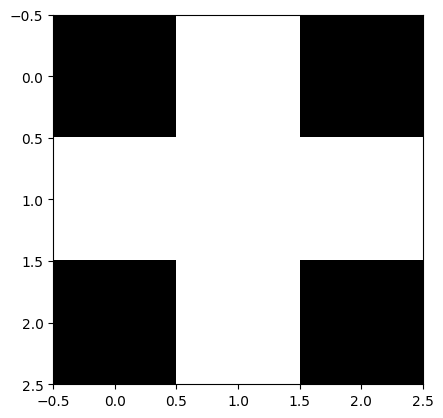

In [3]:
element1 = np.array([[0, 1, 0],      # 1 = white
                    [1,1,1],        # 0 = Black
                    [0,1,0]])

plt.imshow(element1, cmap="gray")

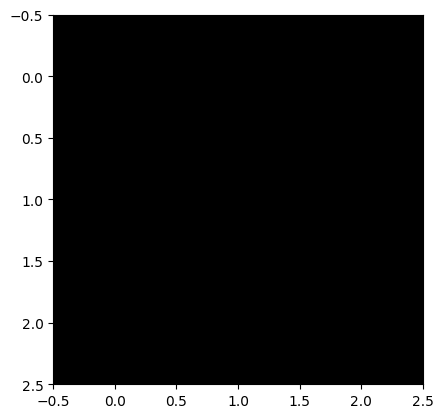

In [4]:
element2 = np.array([[1,1,1],    # All zeros or all ones will be black
                    [1,1,1],
                    [1,1,1]])

plt.imshow(element2, cmap="gray")

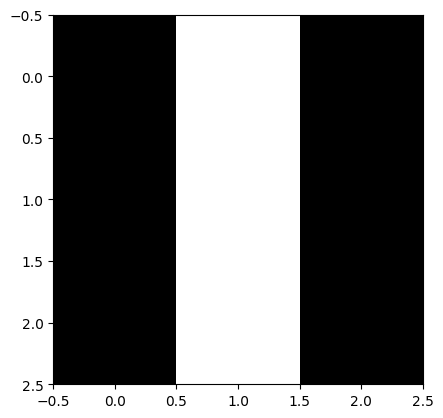

In [5]:
element = np.array([[0,1,0],
                    [0,1,0],
                    [0,1,0]])

plt.imshow(element, cmap="gray")

## Image Creation

/tmp/ipython-input-3667431317.py:11: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(circle_image)


(np.float64(-0.5), np.float64(39.5), np.float64(24.5), np.float64(-0.5))

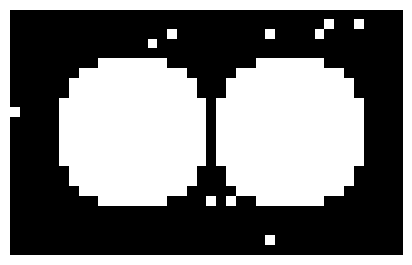

In [16]:
# Creating image of two circles
circle_image = np.zeros((25, 40))
circle_image[disk((12,12), 8)] = 1  # Changing numbers give different circles
circle_image[disk((12,28), 8)] = 1

for x in range(20):
  circle_image[np.random.randint(25), np.random.randint(40)] = 1   # Adding random noise to the image

# Show the image
plt.figure(figsize=(6,3))
imshow(circle_image)
plt.axis("off")


(np.float64(-0.5), np.float64(39.5), np.float64(24.5), np.float64(-0.5))

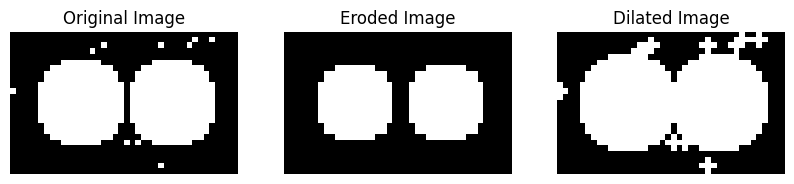

In [17]:
# Plotting all 3 images using Element Structure 1
fig, ax = plt.subplots(1,3, figsize=(10,5))
ax[0].imshow(circle_image, cmap="gray");
ax[0].set_title("Original Image")
ax[0].axis('off')

# Eroded Image
ax[1].imshow(erosion(circle_image, element1), cmap="gray");
ax[1].set_title("Eroded Image")
ax[1].axis('off')

# Dilated Image
ax[2].imshow(dilation(circle_image, element1), cmap="gray");
ax[2].set_title("Dilated Image")
ax[2].axis('off')


(np.float64(-0.5), np.float64(39.5), np.float64(24.5), np.float64(-0.5))

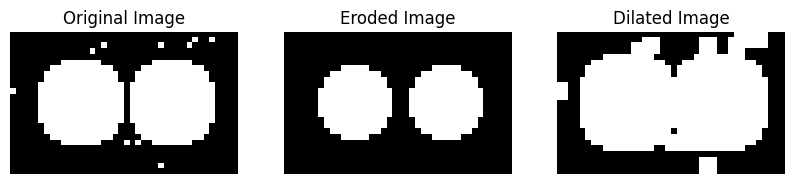

In [18]:
# Plotting all 3 images using Element Structure 2
fig, ax = plt.subplots(1,3, figsize=(10,5))
ax[0].imshow(circle_image, cmap="gray");
ax[0].set_title("Original Image")
ax[0].axis('off')

# Eroded Image
ax[1].imshow(erosion(circle_image, element2), cmap="gray");
ax[1].set_title("Eroded Image")
ax[1].axis('off')

# Dilated Image
ax[2].imshow(dilation(circle_image, element2), cmap="gray");
ax[2].set_title("Dilated Image")
ax[2].axis('off')

(np.float64(-0.5), np.float64(39.5), np.float64(24.5), np.float64(-0.5))

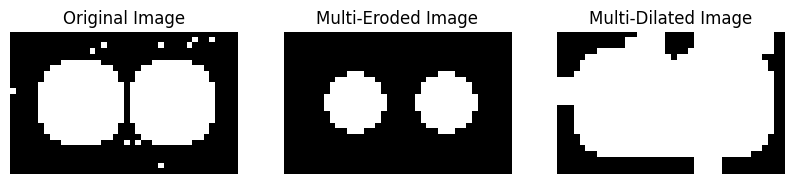

In [20]:
# Multi erosion and dilation functions
def multi_dil(im, num, element = element2):
  for i in range(num):
    im = dilation(im, element)
  return im

def multi_ero(im, num, element = element2):
  for i in range(num):
    im = erosion(im, element)
  return im

num=2

# Plotting the multi-eroded and multi-dilated images
fig, ax = plt.subplots(1,3, figsize=(10,5))
ax[0].imshow(circle_image, cmap="gray");
ax[0].set_title("Original Image")
ax[0].axis('off')

# Multi-Eroded
ax[1].imshow(multi_ero(circle_image, num, element2), cmap="gray");
ax[1].set_title("Multi-Eroded Image")
ax[1].axis('off')

# Multi-Dilated
ax[2].imshow(multi_dil(circle_image, num, element2), cmap="gray");
ax[2].set_title("Multi-Dilated Image")
ax[2].axis('off')

## Opening and Closing Operations

(np.float64(-0.5), np.float64(39.5), np.float64(24.5), np.float64(-0.5))

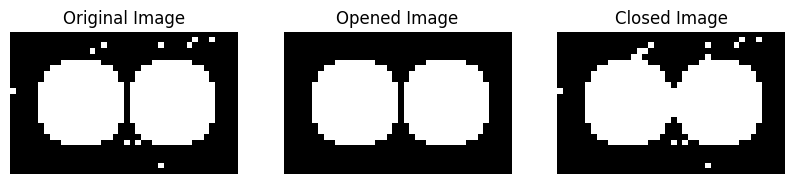

In [24]:
fig, ax = plt.subplots(1,3, figsize=(10,5))
ax[0].imshow(circle_image, cmap="gray");
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(opening(circle_image, element1), cmap="gray");
ax[1].set_title("Opened Image")
ax[1].axis('off')

ax[2].imshow(closing(circle_image, element1), cmap="gray");
ax[2].set_title("Closed Image")
ax[2].axis('off')

## Fingerprint Image

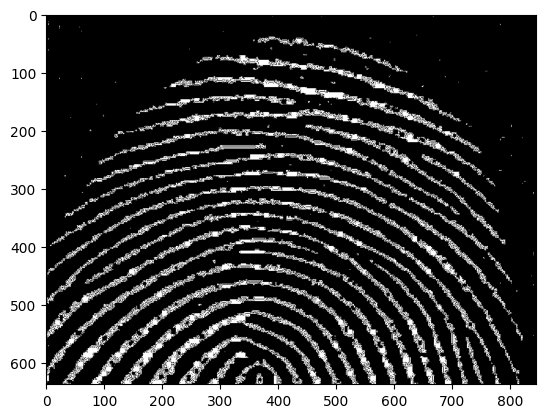

In [38]:
# Import image
image1 = io.imread("/content/finger3.jpg")

# Convert to greyscale 0-1
image2 = color.rgb2gray(image1)

# Convert greyscale image to float
image = image2.astype(float)

# Convert to binary image
binary_image1 = image < 1

# Reverse the binary image
binary_image = 1 - binary_image1

plt.imshow(binary_image, cmap="gray")

/tmp/ipython-input-682440816.py:2: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  selem = morphology.square(2)


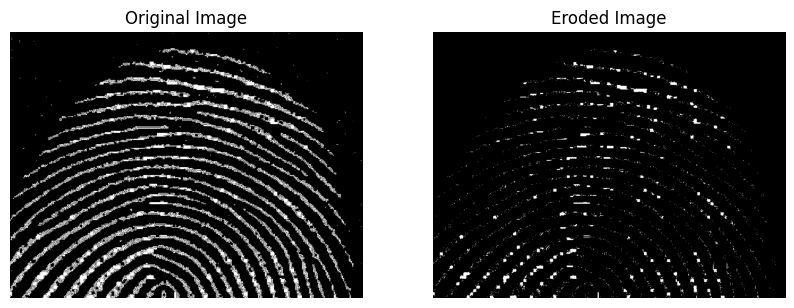

In [39]:
# Define the disk-shaped structure
selem = morphology.square(2)
selem = morphology.disk(radius=1)

# Apply binary_erosion
eroded_image = morphology.binary_erosion(binary_image, footprint=selem)

# Plot
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.imshow(binary_image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(eroded_image, cmap="gray")
plt.title("Eroded Image")
plt.axis("off")

plt.show()

## Letter 'A' Image

/tmp/ipython-input-819115127.py:13: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  structuring_element = morphology.square(structuring_element_size)


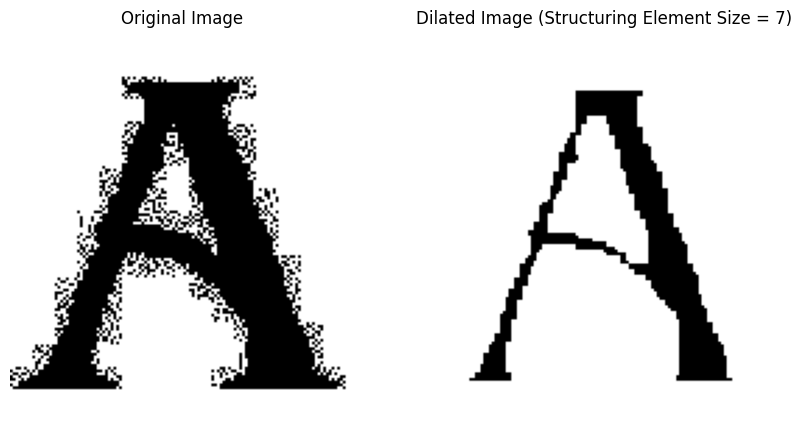

In [43]:
image1 = io.imread("/content/let_A.jpg")

# Convert to greyscale 0-1 and float
image2 = color.rgb2gray(image1)
image = image2.astype(float)

# Create binary image and invert it
binary_image1 = image < 1
binary_image = 1 - binary_image1

#  Structuring element
structuring_element_size = 7
structuring_element = morphology.square(structuring_element_size)

# Apply binary_dilation -expands white regions (1 pixel values)
eroded_image = morphology.binary_dilation(binary_image, footprint=structuring_element)

# Plot
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(binary_image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(eroded_image, cmap="gray")
plt.title("Dilated Image (Structuring Element Size = {})".format(structuring_element_size))
plt.axis("off")

plt.show()

## PCB Image

(np.float64(-0.5), np.float64(485.5), np.float64(485.5), np.float64(-0.5))

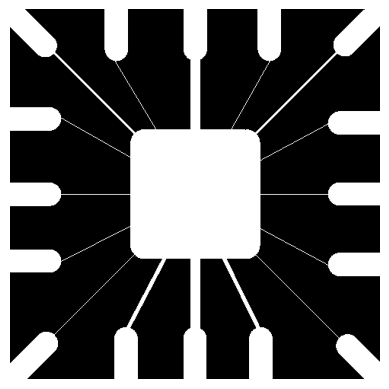

In [31]:
# Import image
image = io.imread("/content/pcb.tif")

# Convert to binary image (0 or 255 pixel values only)
binary_image = image < 1

plt.imshow(binary_image, cmap="gray")
plt.axis("off")

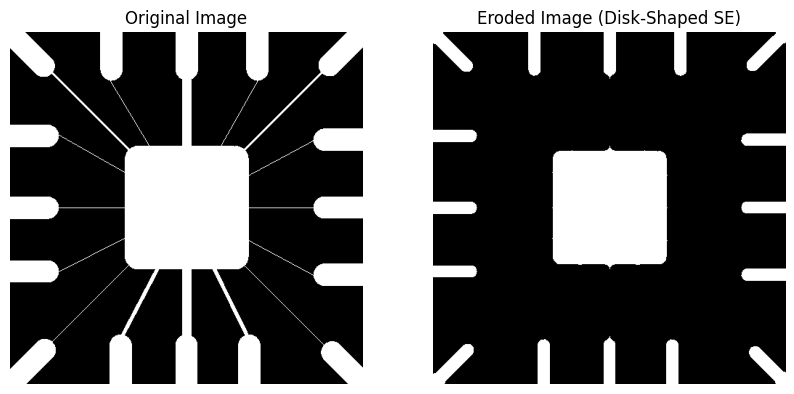

In [32]:
# Structuring element
selem = morphology.disk(radius=7)

# Apply binary erosion - eliminates thin lines and shrinks objects
eroded_image = morphology.binary_erosion(binary_image, footprint=selem)

# Plot
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(binary_image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(eroded_image, cmap="gray")
plt.title("Eroded Image (Disk-Shaped SE)")
plt.axis("off")

plt.show()

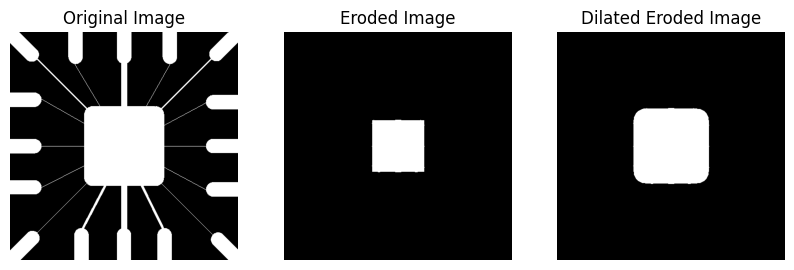

In [34]:
# Get rid of the lines but keep the square in the middle the same size. Apply erosion then dilation.
selem = morphology.disk(radius=30)

# Erosion
eroded_image = morphology.binary_erosion(binary_image, footprint=selem)

# Dilation using square
# structuring_element_size = 30
# structure_element = morphology.square(structuring_element_size)
# dilated_image = morphology.binary_dilation(eroded_image, footprint=structure_element)

# Dilation using disk
structure_element = morphology.disk(radius=25)
dilated_image = morphology.binary_dilation(eroded_image, footprint=structure_element)

# Plotting the images
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.imshow(binary_image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(eroded_image, cmap="gray")
plt.title("Eroded Image")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(dilated_image, cmap="gray")
plt.title("Dilated Eroded Image")
plt.axis("off")

plt.show()